<ol>
<li>Read the data from <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv">https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv</a>
<li>Remove any data that is outside the NYC bounding box
<ul>
<li>NYC bounding box: westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
<li>See http://boundingbox.klokantech.com for info on bounding boxes
</ul>
<li>Calculate taxi trip duration and save in a new column "duration"
<li>Break the bounding box into 100 "zones" 
<ul>
<li>Divide the longitude (-73.7526 to -74.2635) into 10 sections
<li>Divide the latitude (40.4856 to 40.9596) into 10 sections
<li>Construct a dicti
<li>Write a function that, given a latitude and longitude, returns the zone number associated with that latitude and longitude
<li>Construct new columns "Pickup Zone" and "Dropoff Zone"
</ul>
<li>Group data by zone and draw a barchart that shows the top 10 pickup zones and top 10 dropoff zones
<li>Make a new column "hour of day" that extracts the pickup hour of day
<li>Group data by hour of day and by zone
<li>Draw a figure containing subfigures for each hour of the day and the top 5 pickup zones for the hour

<h2>Read the data</h2>

In [1]:
import pandas as pd
import numpy as np

datafile = "/Users/hardeepjohar/Downloads/yellow_tripdata_2016-01.csv"
df = pd.read_csv(datafile)

<h2>Remove data outside the bounding box</h2>


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10906858 entries, 0 to 10906857
Data columns (total 19 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID               int64
store_and_fwd_flag       object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.5+ GB


In [3]:
westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
df = df[(df['pickup_latitude'] > southlimit) & (df['pickup_latitude'] < northlimit) &
       (df['pickup_longitude'] > westlimit) & (df['pickup_longitude'] < eastlimit)]
df = df[(df['dropoff_latitude'] > southlimit) & (df['dropoff_latitude'] < northlimit) &
       (df['dropoff_longitude'] > westlimit) & (df['dropoff_longitude'] < eastlimit)]

<h2>Calculate taxi trip duration</h2>

In [4]:
def str_to_datetime(str_date):
    import datetime
    return datetime.datetime.strptime(str_date,"%Y-%m-%d %H:%M:%S")
import datetime

df['duration'] = df['tpep_dropoff_datetime'].apply(lambda x: str_to_datetime(x)) - df['tpep_pickup_datetime'].apply(lambda x: str_to_datetime(x))


In [5]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,1.070403e+07,1.070403e+07,1.070403e+07,1.070403e+07,1.070403e+07,1.070403e+07,1.070403e+07,1.070403e+07,1.070403e+07,1.070403e+07,1.070403e+07,1.070403e+07,1.070403e+07,1.070403e+07,1.070403e+07,1.070403e+07,10704033
mean,1.538864e+00,1.674576e+00,4.668964e+00,-7.397335e+01,4.075102e+01,1.033117e+00,-7.397383e+01,4.075197e+01,1.346396e+00,1.238980e+01,3.133304e-01,4.979924e-01,1.741383e+00,2.910950e-01,2.997722e-01,1.553336e+01,0 days 00:15:16.789427
std,4.984873e-01,1.329069e+00,3.009206e+03,3.801938e-02,2.788816e-02,3.732930e-01,3.339846e-02,3.157893e-02,4.903598e-01,3.560860e+01,4.160432e-01,3.486769e-02,2.509041e+00,1.659119e+00,1.140407e-02,3.641014e+01,0 days 01:27:23.871614
min,1.000000e+00,0.000000e+00,0.000000e+00,-7.426337e+01,4.048822e+01,1.000000e+00,-7.426349e+01,4.048641e+01,1.000000e+00,-9.576000e+02,-4.500000e+00,-5.000000e-01,-7.000000e+01,-1.740000e+01,-3.000000e-01,-9.584000e+02,0 days 00:00:00
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399164e+01,4.073757e+01,1.000000e+00,-7.399122e+01,4.073628e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00,0 days 00:06:21
50%,2.000000e+00,1.000000e+00,1.680000e+00,-7.398168e+01,4.075440e+01,1.000000e+00,-7.397978e+01,4.075475e+01,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.260000e+00,0.000000e+00,3.000000e-01,1.162000e+01,0 days 00:10:29
75%,2.000000e+00,2.000000e+00,3.080000e+00,-7.396720e+01,4.076837e+01,1.000000e+00,-7.396314e+01,4.076995e+01,2.000000e+00,1.400000e+01,5.000000e-01,5.000000e-01,2.320000e+00,0.000000e+00,3.000000e-01,1.716000e+01,0 days 00:16:53
max,2.000000e+00,9.000000e+00,8.000010e+06,-7.375268e+01,4.095950e+01,9.900000e+01,-7.375261e+01,4.095958e+01,5.000000e+00,1.112709e+05,6.488700e+02,2.050000e+01,9.981400e+02,9.801500e+02,3.000000e-01,1.112716e+05,83 days 06:32:42


<h2>Convert duration into a float</h2>

In [6]:
df['duration'] = df['duration'].apply(lambda x:x/np.timedelta64(1, 's'))

Remove data where duration < 10000

In [7]:

df = df[df['duration'] < 10000]
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07
mean,1.538162e+00,1.673961e+00,4.670407e+00,-7.397335e+01,4.075103e+01,1.033065e+00,-7.397383e+01,4.075198e+01,1.346251e+00,1.238549e+01,3.133309e-01,4.979944e-01,1.741952e+00,2.908759e-01,2.997733e-01,1.552940e+01,7.891339e+02
std,4.985415e-01,1.328390e+00,3.011549e+03,3.800593e-02,2.788292e-02,3.732872e-01,3.338987e-02,3.157431e-02,4.903291e-01,3.562622e+01,4.161322e-01,3.485144e-02,2.504813e+00,1.659055e+00,1.138490e-02,3.642516e+01,6.123039e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,-7.426337e+01,4.048822e+01,1.000000e+00,-7.426349e+01,4.048641e+01,1.000000e+00,-3.000000e+02,-4.500000e+00,-5.000000e-01,-7.000000e+01,-1.740000e+01,-3.000000e-01,-3.008000e+02,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399164e+01,4.073757e+01,1.000000e+00,-7.399122e+01,4.073628e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00,3.810000e+02
50%,2.000000e+00,1.000000e+00,1.680000e+00,-7.398168e+01,4.075440e+01,1.000000e+00,-7.397978e+01,4.075475e+01,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.260000e+00,0.000000e+00,3.000000e-01,1.160000e+01,6.280000e+02
75%,2.000000e+00,2.000000e+00,3.080000e+00,-7.396720e+01,4.076837e+01,1.000000e+00,-7.396314e+01,4.076995e+01,2.000000e+00,1.400000e+01,5.000000e-01,5.000000e-01,2.320000e+00,0.000000e+00,3.000000e-01,1.716000e+01,1.010000e+03
max,2.000000e+00,9.000000e+00,8.000010e+06,-7.375268e+01,4.095950e+01,9.900000e+01,-7.375261e+01,4.095958e+01,5.000000e+00,1.112709e+05,6.488700e+02,2.050000e+01,9.981400e+02,9.801500e+02,3.000000e-01,1.112716e+05,9.990000e+03


<h3>Compare with gamma distribution</h3>

/Users/hardeepjohar/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


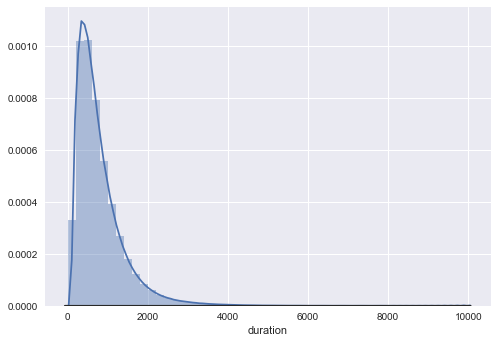

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from scipy import stats
sns.distplot(df['duration'],kde=True,fit=stats.gamma)

<h2>Calculate mean, median and standard deviation of duration in minutes</h2>

In [9]:
print(df['duration'].mean()/60)
print(df['duration'].median()/60)
print(df['duration'].std()/60)

13.152231592252447
10.466666666666667
10.205065708164216


<h2>Draw duration distance scatterplot</h2>

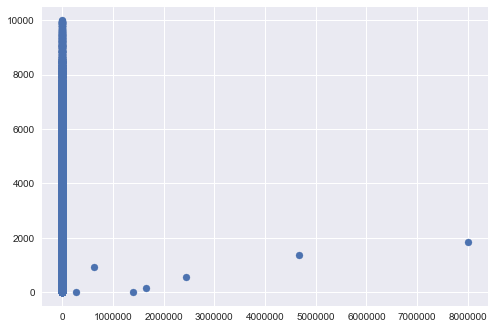

In [10]:
plt.scatter(df['trip_distance'],df['duration'])

<li>Looks like some whacko trip distances are in the data

In [11]:
print(sum(df['trip_distance'] > 10000))
print(sum(df['trip_distance'] > 5000))
print(sum(df['trip_distance'] > 1000))
print(sum(df['trip_distance'] > 100))


7
7
7
56


<li>Let's get rid of any trip distance > 100
<li>They will probably mess up our results

In [12]:
df = df[df['trip_distance'] < 100]

In [13]:
print(sum(df['trip_distance'] > 10000))
print(sum(df['trip_distance'] > 5000))
print(sum(df['trip_distance'] > 1000))
print(sum(df['trip_distance'] > 100))


0
0
0
0


In [14]:
#df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].apply(lambda x: str_to_datetime(x)) 
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x: str_to_datetime(x)) 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10687328 entries, 0 to 10906857
Data columns (total 20 columns):
VendorID                 int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID               int64
store_and_fwd_flag       object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
duration                 float64
dtypes: datetime64[ns](1), float64(13), int64(4), object(2)
memory usage: 1.7+ GB


<h3>Get day of week</h3>

In [16]:
df['day_of_week'] = df['tpep_pickup_datetime'].apply(lambda x:datetime.datetime.weekday(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10687328 entries, 0 to 10906857
Data columns (total 21 columns):
VendorID                 int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID               int64
store_and_fwd_flag       object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
duration                 float64
day_of_week              int64
dtypes: datetime64[ns](1), float64(13), int64(5), object(2)
memory usage: 1.8+ GB


<h2>Create time of day buckets using the hour of the pickup time</h2>
<h2>and group the data by day of week and pickup hour</h2>

In [17]:
df['pickup_hour'] =df['tpep_pickup_datetime'].apply(lambda x:x.hour)

In [18]:
df['pickup_hour'].unique()

array([ 0,  9,  1,  2, 20,  3, 11,  4, 21,  5,  6,  7, 12, 22,  8, 23, 10,
       13, 14, 15, 16, 17, 18, 19])

In [19]:
grouped = df.groupby(['day_of_week','pickup_hour'])

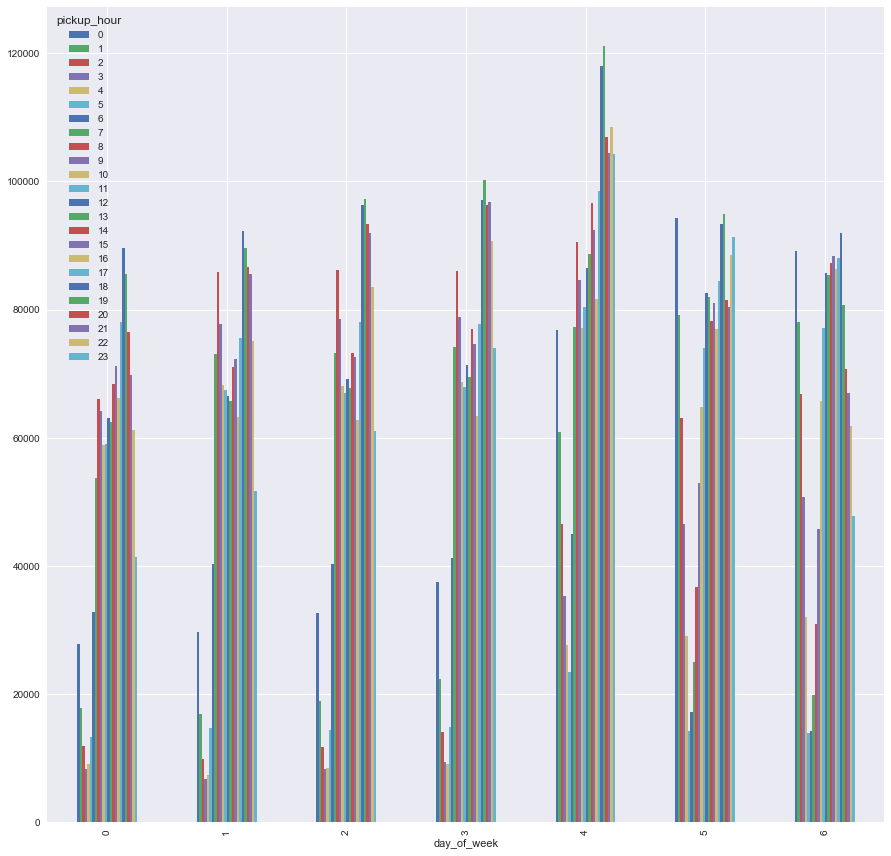

In [20]:
grouped.size().unstack().plot(kind='bar',figsize=(15,15))

<h2>Create zones</h2>
<li>function for creating zones


In [21]:
def createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596):
    lat_range = northlimit - southlimit
    lon_range = eastlimit - westlimit
    latitude_ranges = np.append(np.arange(southlimit+lat_range/zone_factor,
                                          northlimit,lat_range/zone_factor,dtype=float),northlimit)
    longitude_ranges = np.append(np.arange(westlimit+lon_range/zone_factor,
                                           eastlimit,lon_range/zone_factor,dtype=float),eastlimit)
    zone_table = list()
    for i in range(len(latitude_ranges)):
        if i == 0:
            lat1 = southlimit
        else:
            lat1 = latitude_ranges[i-1]
        lat2 = latitude_ranges[i]
        for j in range(len(longitude_ranges)):
            if j == 0:
                lon1 = westlimit
            else:
                lon1 = longitude_ranges[j-1]
            lon2 = longitude_ranges[j]
            zone = str(i) + str(j)
            zone_bounds = [[lon1,lat1],[lon2,lat1],[lon2,lat2],[lon1,lat2],[lon1,lat1]]
            zone_table.append((zone,zone_bounds))
        
    return zone_table
zone_table = createZoneTable(20)    

In [22]:
zone_table

[('00',
  [[-74.2635, 40.4856],
   [-74.237955, 40.4856],
   [-74.237955, 40.509299999999996],
   [-74.2635, 40.509299999999996],
   [-74.2635, 40.4856]]),
 ('01',
  [[-74.237955, 40.4856],
   [-74.21241, 40.4856],
   [-74.21241, 40.509299999999996],
   [-74.237955, 40.509299999999996],
   [-74.237955, 40.4856]]),
 ('02',
  [[-74.21241, 40.4856],
   [-74.18686500000001, 40.4856],
   [-74.18686500000001, 40.509299999999996],
   [-74.21241, 40.509299999999996],
   [-74.21241, 40.4856]]),
 ('03',
  [[-74.18686500000001, 40.4856],
   [-74.16132000000002, 40.4856],
   [-74.16132000000002, 40.509299999999996],
   [-74.18686500000001, 40.509299999999996],
   [-74.18686500000001, 40.4856]]),
 ('04',
  [[-74.16132000000002, 40.4856],
   [-74.13577500000002, 40.4856],
   [-74.13577500000002, 40.509299999999996],
   [-74.16132000000002, 40.509299999999996],
   [-74.16132000000002, 40.4856]]),
 ('05',
  [[-74.13577500000002, 40.4856],
   [-74.11023000000003, 40.4856],
   [-74.11023000000003, 40.50

<h2>function for creating geojson based on zone boundaries </h2>

In [23]:
def createZoneGeoJson(zone_table):
    zone_data_dict = dict()
    zone_data_dict['type'] = 'FeatureCollection'
    zone_data_dict_features = list()
    zone_data_dict['features'] = zone_data_dict_features
    for i in range(len(zone_table)):
        zone_data = zone_table[i]
        zone = zone_data[0]
        zone_box = zone_data[1]
        zone_object = dict()
        zone_object['type'] = 'Feature'
        zone_object['geometry'] = {'type':'Polygon','coordinates':[zone_box]}
        zone_object['properties'] = {'zone_id':zone}
        zone_data_dict_features.append(zone_object.copy())
        
    return zone_data_dict
geojsonfile = createZoneGeoJson(zone_table)

<h2>Function for getting zones</h2>

In [24]:
def get_zone(lat,lon,zone_table):
    import numpy as np
    for zone in zone_table:
        if lon <= zone[1][1][0] and lon >= zone[1][0][0]:
            if lat >= zone[1][0][1] and lat <= zone[1][2][1]:
                return zone[0]
    print(lat,lon)
    return np.nan
                                                   
get_zone(40.49,-74.320,zone_table)    

40.49 -74.32


nan

In [25]:
df['pickup_zone'] = df.apply(lambda x: get_zone(x['pickup_latitude'], x['pickup_longitude'],zone_table), axis=1)
df['dropoff_zone'] = df.apply(lambda x: get_zone(x['dropoff_latitude'], x['dropoff_longitude'],zone_table), axis=1)


<h2>Calculate the following</h2>
<li>Percentage of the total rides where the pickup zone is the same as the dropoff zone
<li>Zone with the highest pickups
<li>Zone with the highest dropoffs

In [26]:
#Percentage of the total rides where the pickup zone is the same as the dropoff zone
print(df[df['pickup_zone'] == df['dropoff_zone']].count()/len(df)*100)


VendorID                 23.652048
tpep_pickup_datetime     23.652048
tpep_dropoff_datetime    23.652048
passenger_count          23.652048
trip_distance            23.652048
pickup_longitude         23.652048
pickup_latitude          23.652048
RatecodeID               23.652048
store_and_fwd_flag       23.652048
dropoff_longitude        23.652048
dropoff_latitude         23.652048
payment_type             23.652048
fare_amount              23.652048
extra                    23.652048
mta_tax                  23.652048
tip_amount               23.652048
tolls_amount             23.652048
improvement_surcharge    23.652048
total_amount             23.652048
duration                 23.652048
day_of_week              23.652048
pickup_hour              23.652048
pickup_zone              23.652048
dropoff_zone             23.652048
dtype: float64


In [27]:
pickup_groups = df.groupby('pickup_zone')
dropoff_groups = df.groupby('dropoff_zone')
print(pickup_groups.max())
print(dropoff_groups.max())

             VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
pickup_zone                                                        
010                 2  2016-01-30 05:51:37   2016-01-30 06:03:51   
07                  2  2016-01-21 16:16:39   2016-01-21 16:31:17   
08                  2  2016-01-08 20:01:05   2016-01-08 20:05:41   
100                 2  2016-01-30 14:13:55   2016-01-30 14:15:28   
101                 1  2016-01-17 03:22:02   2016-01-17 03:22:52   
1010                2  2016-01-31 23:59:59   2016-02-01 00:33:49   
1011                2  2016-01-31 23:59:51   2016-02-01 00:28:44   
1012                2  2016-01-31 23:59:41   2016-02-01 00:13:08   
1013                2  2016-01-31 23:58:54   2016-02-01 00:03:59   
1014                2  2016-01-31 23:47:18   2016-01-31 23:54:32   
1015                2  2016-01-31 23:59:19   2016-02-01 00:02:14   
1016                2  2016-01-31 23:52:48   2016-02-01 00:08:59   
1017                2  2016-01-31 23:53:43   201

              VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
dropoff_zone                                                        
00                   2  2016-01-23 02:51:36   2016-01-23 03:54:43   
01                   2  2016-01-29 03:04:45   2016-01-29 04:04:04   
08                   2  2016-01-08 20:01:05   2016-01-08 20:05:41   
10                   2  2016-01-30 20:20:20   2016-01-30 21:09:08   
100                  2  2016-01-30 14:59:11   2016-01-30 16:22:16   
101                  2  2016-01-29 20:08:06   2016-01-29 21:27:27   
1010                 2  2016-01-31 23:59:59   2016-02-01 00:29:54   
1011                 2  2016-01-31 23:59:46   2016-02-01 00:28:13   
1012                 2  2016-01-31 23:59:06   2016-02-01 00:22:47   
1013                 2  2016-01-31 23:59:40   2016-02-01 00:17:51   
1014                 2  2016-01-31 23:59:33   2016-02-01 00:19:43   
1015                 2  2016-01-31 23:57:33   2016-02-01 00:19:06   
1016                 2  2016-01-31

<h2>Groupby analysis</h2>
<li>Group data by the hour of the day and by the pickup zone
<li>Draw a figure of 24 plots that show the top 5 pickup zones at each hour


In [45]:
group_by_hour_and_zone = df.groupby(['pickup_zone','pickup_hour'])

In [ ]:
group_by_hour_and_zone_sizes = group_by_hour_and_zone.size().unstack()


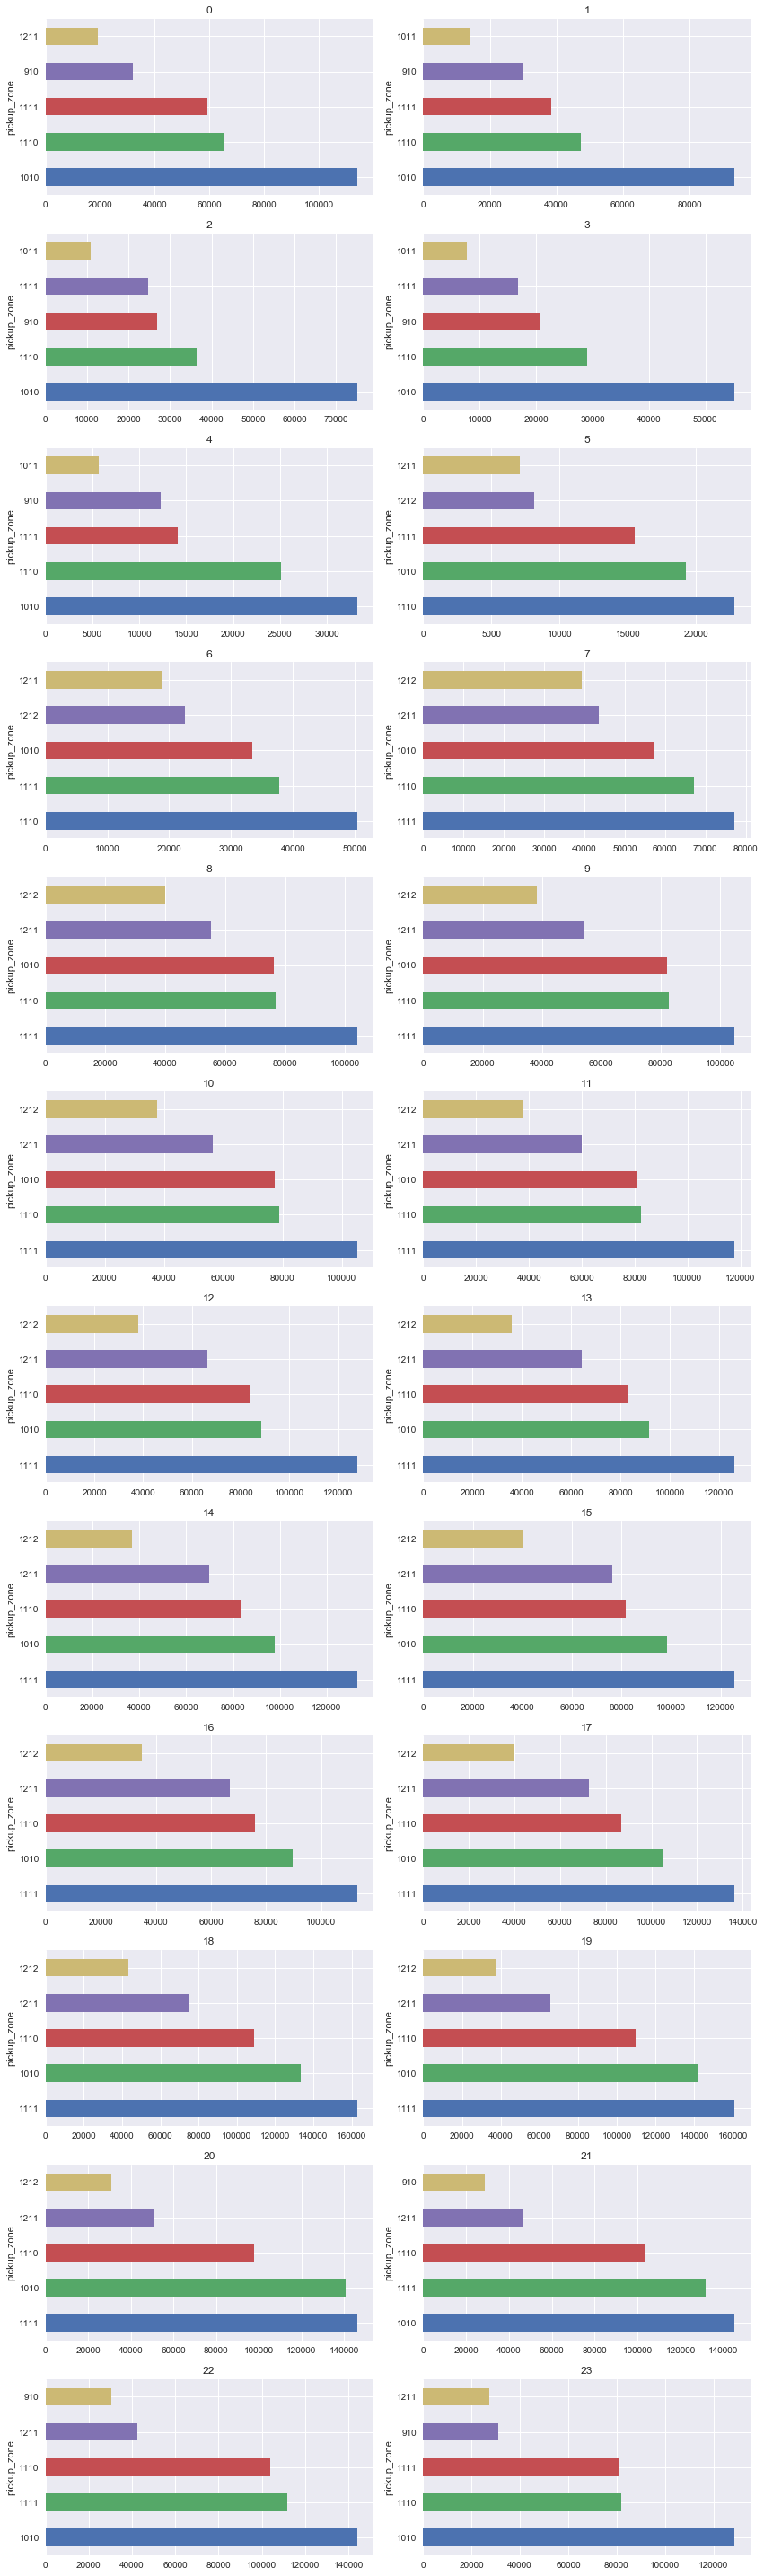

In [59]:
COL_NUM = 2
ROW_NUM = 12
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,40))


for i, (hour, cnt) in enumerate(group_by_hour_and_zone_sizes.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    cnt = cnt.sort_values(ascending=False)[:5] 
    cnt.plot(kind='barh', ax=ax)
    ax.set_title(hour)
plt.tight_layout() 

<h2>Groupby analysis 2</h2>
<li>Group data by the weekday and the pickup zone
<li>Draw a figure of 7 plots that show the top 5 pickup zones on each day

In [60]:
group_by_weekday_and_zone = df.groupby(['pickup_zone','day_of_week'])
group_by_weekday_and_zone_sizes = group_by_weekday_and_zone.size().unstack()

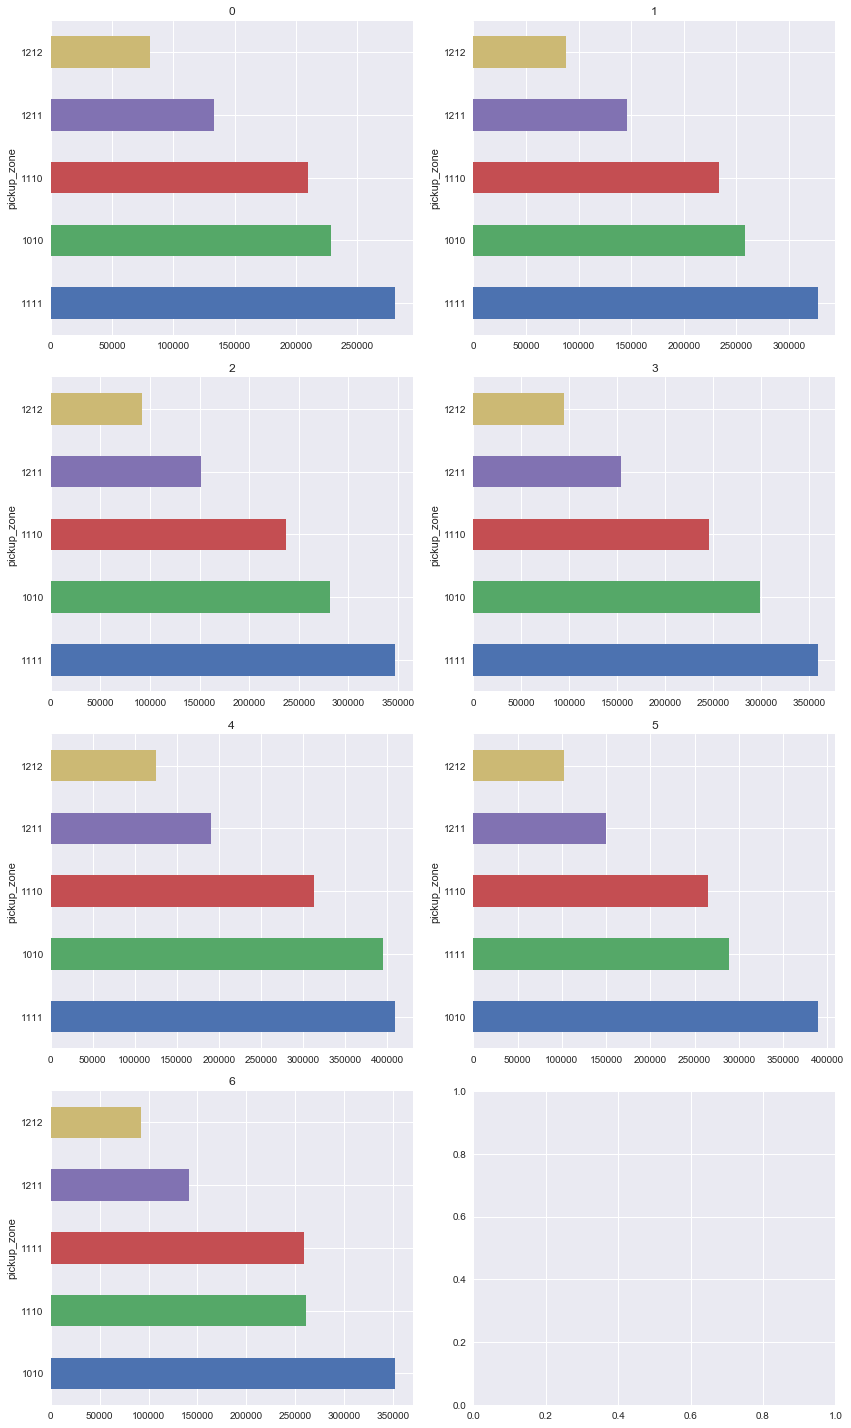

In [62]:
COL_NUM = 2
ROW_NUM = 4
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,20))


for i, (d_o_w, cnt) in enumerate(group_by_weekday_and_zone_sizes.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    cnt = cnt.sort_values(ascending=False)[:5] 
    cnt.plot(kind='barh', ax=ax)
    ax.set_title(d_o_w)
plt.tight_layout() 

<h1>Most frequent morning pickups</h1>
<li>Identify the most frequent pickup zone between 8 am and 9 am on a weekday



In [73]:
df_reduced = df[(df['pickup_hour']==8) & (df['day_of_week']<5) ]
print("Most frequent pickup zone:",df_reduced.groupby('pickup_zone').size().idxmax())

Most frequent pickup zone: 1111


<h2>Mapping</h2>
<li>Draw a folium map using the polygon geojson object and the counts dataframe (see class example)

In [30]:
groups = df.groupby('pickup_zone')
df_2 = pd.DataFrame(groups.size()).rename(columns={0:"size"})
df_2.reset_index(level=0, inplace=True)


In [31]:
import folium
#Center the map at Times Square
m = folium.Map(location = [40.7589,-73.9851],zoom_start=12)

m.choropleth(geo_data=createZoneGeoJson(zone_table), data=df_2,
             columns=[ 'pickup_zone','size'],
             key_on='feature.properties.zone_id',
             fill_color='RdYlGn', fill_opacity=0.4, line_opacity=0.8,
             legend_name='Distribution of Incidents')

In [32]:
m

<h2>Removing zones with no or few pickups</h2>

<li>Identify the zones we want to keep</li>

In [115]:

zones_with_data = df['pickup_zone'].unique()
#To make the graph nicer, we'll remove zones with less than 100 pickups
zone_sizes = df.groupby('pickup_zone').size()
for zone in zone_sizes.index:
    if zone_sizes[zone]<100:
        zones_with_data=np.delete(zones_with_data,np.where(zones_with_data == zone))

<li>Remove unwanted zones from the geojson data </li>

In [116]:
geojsondata = createZoneGeoJson(zone_table)
feature_list = geojsondata['features']
new_feature_list = list()
for feature in feature_list:
    zone = feature['properties']['zone_id']
    if zone in zones_with_data:
        new_feature_list.append(feature)
geojsondata['features'] = new_feature_list

<li>Remove data from nogo zones


In [123]:
df_red = df[(df['pickup_zone'].isin(zones_with_data))]

In [124]:
groups = df_red.groupby('pickup_zone')
df_2 = pd.DataFrame(groups.size()).rename(columns={0:"size"})
df_2.reset_index(level=0, inplace=True)
import folium
#Center the map at Times Square
m = folium.Map(location = [40.7589,-73.9851],zoom_start=12)

m.choropleth(geo_data=geojsondata, data=df_2,
             columns=[ 'pickup_zone','size'],
             key_on='feature.properties.zone_id',
             fill_color='RdYlGn', fill_opacity=0.4, line_opacity=0.8,
             legend_name='Distribution of Incidents')

In [125]:
m

<li>Not much better because our range is from 100 to 2million!
<li>TRY THIS: 
<ol>
<li>Define a bounding box for Manhattan below 116th street (https://boundingbox.klokantech.com/)
<li>westlimit=-74.036497; southlimit=40.691937; eastlimit=-73.927264; northlimit=40.811605
<li>generate 20x20 zones for this box
<li>add these pickupzones to the dataframe
<li>remove any data that is not in these zones
<li>rerun the map code
<li>Data analysis is an iterative process!